In [3]:
from env import ImgRouterEvalEnv
from lightning_lite.utilities.seed import seed_everything
from bandit_algo import BanditAlgorithm
from preference_estimator import (
    EmpiricalEstimator,
    NeuralEstimator,
    RecurrentNeuralEstimator,
    RecurrentNeuralEstimatorV0,
)
from exploration_strategy import (
    PerArmExploration,
    UniformEpsilonExploration,
)
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")


Global seed set to 0


0

In [5]:
def main(algo):
    seed_everything(0)
    num_candidates = 256
    max_steps = 200
    cfg = {
        "num_candidates": num_candidates,
        "max_steps": max_steps,
    }
    env = ImgRouterEvalEnv(cfg)


    reduce_fator = 2
    num_slates = num_candidates // reduce_fator

    obs = env.reset()
    # print("initial obs:", obs)
    done = False
    step_rewards = []
    pred_losses = []
    step = 0
    while not done:
        action = algo.predict(obs)
        next_obs, reward, done, info = env.step(action)
        algo.update_estimator(obs, action, info["rewards"])
        obs = next_obs
        step_rewards.append(reward)
        # pred_loss = (algo.estimator.Q - env.Q) ** 2
        # pred_losses.append(pred_loss)
        step += 1

    print("current samples after training:")
    print(env.current_samples)
    # routed_data = env.current_samples - existing_samples
    # routed_data = env.current_samples
    # print("routed data:")
    # print(routed_data)
    print("reward:", np.mean(step_rewards))
    return step_rewards


In [8]:
estimators = [EmpiricalEstimator, NeuralEstimator, RecurrentNeuralEstimatorV0]
num_tasks = 2
num_cls = 10
reduce_fator = 2
num_candidates = 256
num_slates = num_candidates // reduce_fator

estimator_step_rewards = {}
for estimator_cls in estimators:
    print("estimator:", estimator_cls)
    estimator = estimator_cls(num_tasks, num_cls)
    explore = UniformEpsilonExploration(num_tasks, num_cls, num_slates)
    algo = BanditAlgorithm(
        estimator,
        explore,
    )
    step_rewards = main(algo)
    estimator_step_rewards[estimator_cls.__name__] = step_rewards

Global seed set to 0


estimator: <class 'preference_estimator.EmpiricalEstimator'>
Num parameters: 14648
step 0 epsilon 2.0
step 1 epsilon 1.8
step 2 epsilon 1.62
step 3 epsilon 1.4580000000000002
step 4 epsilon 1.3122000000000003
step 5 epsilon 1.1809800000000004
step 6 epsilon 1.0628820000000003
step 7 epsilon 0.9565938000000003
step 8 epsilon 0.8609344200000003
step 9 epsilon 0.7748409780000003
step 10 epsilon 0.6973568802000003
step 11 epsilon 0.6276211921800003
step 12 epsilon 0.5648590729620003
step 13 epsilon 0.5083731656658003
step 14 epsilon 0.45753584909922024
step 15 epsilon 0.4117822641892982
step 16 epsilon 0.3706040377703684
step 17 epsilon 0.33354363399333153
step 18 epsilon 0.3001892705939984
step 19 epsilon 0.27017034353459857
step 20 epsilon 0.24315330918113873
step 21 epsilon 0.21883797826302487
step 22 epsilon 0.1969541804367224
step 23 epsilon 0.17725876239305016
step 24 epsilon 0.15953288615374514
step 25 epsilon 0.14357959753837063
step 26 epsilon 0.12922163778453358
step 27 epsilon 0

Global seed set to 0


step 198 epsilon 0.01
step 199 epsilon 0.01
current samples after training:
[[2027. 2191. 2058. 2068. 1907. 1819. 1985. 2027. 1912. 1921.]
 [ 551.  557.  582.  573.  581.  550.  561.  560.  579.  591.]]
reward: 1.5307667341828346
estimator: <class 'preference_estimator.NeuralEstimator'>
Neural Estimator num params:  10657
Num parameters: 14648
step 0 epsilon 2.0
step 1 epsilon 1.8
step 2 epsilon 1.62
step 3 epsilon 1.4580000000000002
step 4 epsilon 1.3122000000000003
step 5 epsilon 1.1809800000000004
step 6 epsilon 1.0628820000000003
step 7 epsilon 0.9565938000000003
step 8 epsilon 0.8609344200000003
step 9 epsilon 0.7748409780000003
step 10 epsilon 0.6973568802000003
step 11 epsilon 0.6276211921800003
step 12 epsilon 0.5648590729620003
step 13 epsilon 0.5083731656658003
step 14 epsilon 0.45753584909922024
step 15 epsilon 0.4117822641892982
step 16 epsilon 0.3706040377703684
step 17 epsilon 0.33354363399333153
step 18 epsilon 0.3001892705939984
step 19 epsilon 0.27017034353459857
step 

Global seed set to 0


step 198 epsilon 0.01
step 199 epsilon 0.01
current samples after training:
[[1907. 2177. 1983. 2068. 1716. 1359. 1354. 1461. 1251. 1247.]
 [1027. 1148. 1155. 1022. 1037.  835.  697.  742.  702.  712.]]
reward: 0.8973390445113182
estimator: <class 'preference_estimator.RecurrentNeuralEstimatorV0'>
Recurrent Estimator (one-feed) Num params 29409
Num parameters: 14648
step 0 epsilon 2.0
step 1 epsilon 1.8
step 2 epsilon 1.62
step 3 epsilon 1.4580000000000002
step 4 epsilon 1.3122000000000003
step 5 epsilon 1.1809800000000004
step 6 epsilon 1.0628820000000003
step 7 epsilon 0.9565938000000003
step 8 epsilon 0.8609344200000003
step 9 epsilon 0.7748409780000003
step 10 epsilon 0.6973568802000003
step 11 epsilon 0.6276211921800003
step 12 epsilon 0.5648590729620003
step 13 epsilon 0.5083731656658003
step 14 epsilon 0.45753584909922024
step 15 epsilon 0.4117822641892982
step 16 epsilon 0.3706040377703684
step 17 epsilon 0.33354363399333153
step 18 epsilon 0.3001892705939984
step 19 epsilon 0.

EmpiricalEstimator 1.5307667341828346
NeuralEstimator 0.8973390445113182
RecurrentNeuralEstimatorV0 1.49719083532691


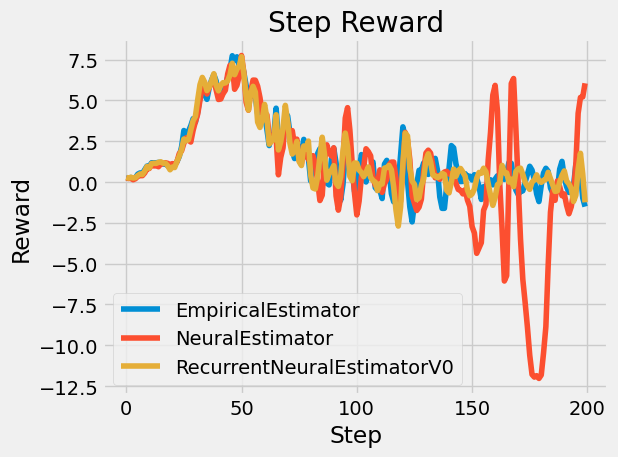

In [9]:
plt.title("Step Reward")
plt.ylabel("Reward")
plt.xlabel("Step")
for estimator_name, step_rewards in estimator_step_rewards.items():
    plt.plot(step_rewards, label=estimator_name)
    print(estimator_name, np.mean(step_rewards))
plt.legend(loc="best");
plt.tight_layout()